# Data Analysis

This notebook is the analysis of the training data. It is used to understand the data.

## Data Loading

In [1]:
# I prefer to use pandas to analyze data
import pandas as pd

In [2]:
# I have downloaded the dataset and put it in the folder "dataset".
data_path = "./raw_data"

products_data_list = [
    pd.read_csv(f"{data_path}/products-data-{i}.tsv", sep="\t", header=None, names=["id", "category", "product_title"])
    for i in range(1, 4)
]
products_data = pd.concat(products_data_list, ignore_index=True)

# reviews-data-2.tsv has a different column order, so I have to handle it separately.
reviews_data_list = [
    pd.read_csv(f"{data_path}/reviews-{i}.tsv", sep="\t", header=None, names=["id", "rating", "review_text"])
    if i != 2
    else pd.read_csv(f"{data_path}/reviews-{i}.tsv", sep="\t", header=None, names=["rating", "id", "review_text"])
    for i in range(1, 4)
]
reviews_data = pd.concat(reviews_data_list, ignore_index=True)

I have a first look at the data by printing the first 3 rows of each table.

In [3]:
products_data.head(3)

,id,category,product_title
0,d242fdc9-772b-4d97-94bb-dabdec22ebe7,Kitchen,iCooker® Amazing Happy Birthday Candles + FREE...
1,05d4b845-1772-4f02-8dcc-b0ef4c1e06f8,Kitchen,"Norpro 3080 Mini Measuring Spoons, 5 Piece Set"
2,b848c565-1a0b-4810-9dfc-9a537cfedcbf,Jewelry,Accessory Accomplice Silvertone Guardian Angel...


In [4]:
reviews_data.head(3)

,id,rating,review_text
0,d242fdc9-772b-4d97-94bb-dabdec22ebe7,5,Worked like a charm! Everyone was amazed by th...
1,05d4b845-1772-4f02-8dcc-b0ef4c1e06f8,5,These are super fun! Easy to figure out true ...
2,b848c565-1a0b-4810-9dfc-9a537cfedcbf,3,I liked it but it is too big. Beautiful piece...


## Merge Tables

As the instructions say, I'm asked to predict the product categories, Kitchen and Jewelry from the product title, rating and review text.

As the features are distributed in different tables, I need to join them together on the product id.

In [5]:
# I use icecream for printing.
from icecream import ic

`pd.describe()` is useful for a first look at the data.

In [6]:
products_data.describe(include="all")

,id,category,product_title
count,1254,1254,1254
unique,1254,3,1227
top,d242fdc9-772b-4d97-94bb-dabdec22ebe7,Jewelry,BlenderBottle Classic Shaker Bottle
freq,1,635,3


In [7]:
reviews_data.describe(include="all")

,id,rating,review_text
count,1254,1254.000000,1254
unique,1254,NaN,1228
top,d242fdc9-772b-4d97-94bb-dabdec22ebe7,NaN,Beautiful
freq,1,NaN,4
mean,NaN,4.235247,NaN
std,NaN,1.244173,NaN
min,NaN,1.000000,NaN
25%,NaN,4.000000,NaN
50%,NaN,5.000000,NaN
75%,NaN,5.000000,NaN


Based on the descriptions, I find that the ids are unique in each table and the number of unique ids is the same in each table. So I can use the id to join the tables after I make sure that all the ids set are the same in each table.

In [8]:
ids_in_products_data = set(products_data["id"].to_list())
ids_in_reviews_data = set(reviews_data["id"].to_list())
ids_in_both_data = ids_in_products_data & ids_in_reviews_data
ids_in_products_data_only = ids_in_products_data - ids_in_reviews_data
ids_in_reviews_data_only = ids_in_reviews_data - ids_in_products_data
ic(len(ids_in_both_data))
ic(len(ids_in_products_data_only))
ic(len(ids_in_reviews_data_only))

ic| len(ids_in_both_data): 1254
ic| len(ids_in_products_data_only): 0
ic| len(ids_in_reviews_data_only): 0


0

Now, I make sure that I can join the two tables on the product id.

In [9]:
merged_data = pd.merge(products_data, reviews_data, on="id").reset_index(drop=True)
# reorder columns for better readability
merged_data = merged_data[["id", "product_title", "rating", "review_text", "category"]]
merged_data.head(3)

,id,product_title,rating,review_text,category
0,d242fdc9-772b-4d97-94bb-dabdec22ebe7,iCooker® Amazing Happy Birthday Candles + FREE...,5,Worked like a charm! Everyone was amazed by th...,Kitchen
1,05d4b845-1772-4f02-8dcc-b0ef4c1e06f8,"Norpro 3080 Mini Measuring Spoons, 5 Piece Set",5,These are super fun! Easy to figure out true ...,Kitchen
2,b848c565-1a0b-4810-9dfc-9a537cfedcbf,Accessory Accomplice Silvertone Guardian Angel...,3,I liked it but it is too big. Beautiful piece...,Jewelry


## data cleaning

I continue to clean the `merged_data`.

In [10]:
merged_data.describe(include="all")

,id,product_title,rating,review_text,category
count,1254,1254,1254.000000,1254,1254
unique,1254,1227,NaN,1228,3
top,d242fdc9-772b-4d97-94bb-dabdec22ebe7,BlenderBottle Classic Shaker Bottle,NaN,Beautiful,Jewelry
freq,1,3,NaN,4,635
mean,NaN,NaN,4.235247,NaN,NaN
std,NaN,NaN,1.244173,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


Based on the description, I find that there are 3 unique values on the `category` column which is unexpected. So I print the unique values.

In [11]:
merged_data["category"].value_counts()

category
Jewelry    635
Kitchen    485
Ktchen     134
Name: count, dtype: int64

Results show that there are 3 unique values: `Jewelry`, `Kitchen` and `Ktchen`. So I need to fix the typo.

In [12]:
merged_data["category"] = merged_data["category"].apply(lambda x: "Kitchen" if x == "Ktchen" else x)
merged_data["category"].value_counts()

category
Jewelry    635
Kitchen    619
Name: count, dtype: int64

Following the same process, I continue to check other columns.

In [13]:
merged_data["rating"].value_counts()

rating
5    811
4    177
3    107
1     91
2     68
Name: count, dtype: int64

The `rating` column has 5 unique values which is expected.

In [14]:
merged_data["review_text"].apply(len)

0        79
1       124
2       127
3        37
4        73
       ... 
1249     55
1250     32
1251    139
1252    147
1253    185
Name: review_text, Length: 1254, dtype: int64

The `review_text` columns has some empty strings which need to be handled on the embedding step.

In [15]:
merged_data["product_title"].apply(len)

0       172
1        46
2        84
3        65
4        89
       ... 
1249     83
1250     55
1251     95
1252     64
1253     59
Name: product_title, Length: 1254, dtype: int64

The `product_title` column has some empty strings which need to be handled on the embedding step.

## Save the cleaned data

Now, I've finished the data cleaning step. I would prepare the data for the prediction task.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# I use 811 as the random seed for reproducibility. The ratio of train, validation and test set is 6:2:2.
merged_data.sample(frac=1, random_state=811)

train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=811)
train_data, validation_data = train_test_split(train_data, test_size=0.25, random_state=811)

After the splitting, I plot the distribution of the ratings in different sets to make sure that the splitting is correct.

In [18]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np


# This is a helper function for plotting the distribution of ratings.
def plot_dist(
    x_labels: List[str],
    model_res_values: List[List[float]],
    value_types: List[List[str]],
    title: str,
):
    """
    Plot the distribution of ratings in each dataset.

    :param x_labels: List of 
    :param model_res_values: List of lists of values for each model.
    :param value_types: List of lists of value types for each model.
    :param title: Title of the plot.
    """
    fig, ax = plt.subplots()

    # Initial bottom for the bars
    bottoms = np.zeros(len(x_labels))

    # All unique value types for legend mapping
    all_value_types = set([val for sublist in value_types for val in sublist])
    color_map = plt.cm.get_cmap(
        "viridis", len(all_value_types)
    )  # Using a colormap for different value types
    type_to_color = {vtype: color_map(i) for i, vtype in enumerate(all_value_types)}

    for model_idx, model_name in enumerate(x_labels):
        for value_idx, (value_type, value) in enumerate(
            zip(value_types[model_idx], model_res_values[model_idx])
        ):
            ax.bar(
                model_name,
                value,
                bottom=bottoms[model_idx],
                label=value_type,
                color=type_to_color[value_type],
            )
            bottoms[model_idx] += value

    # Adding labels and title
    ax.set_ylabel("Percentage of ratings")
    ax.set_title(title)

    # Create legend from color mapping
    handles = [
        plt.Rectangle((0, 0), 1, 1, color=type_to_color[vtype])
        for vtype in all_value_types
    ]
    ax.legend(handles, all_value_types)
    handles = [
        plt.Rectangle((0, 0), 1, 1, color=type_to_color[vtype])
        for vtype in all_value_types
    ]
    ax.legend(handles, all_value_types, bbox_to_anchor=(1.05, 0.7), loc="upper left")

    # Show the plot
    plt.show()

In [19]:
train_data["rating"].value_counts(normalize=True).sort_index()

rating
1    0.067819
2    0.059840
3    0.087766
4    0.139628
5    0.644947
Name: proportion, dtype: float64

C:\Users\Guangchen\AppData\Local\Temp\ipykernel_26852\2139226709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap(


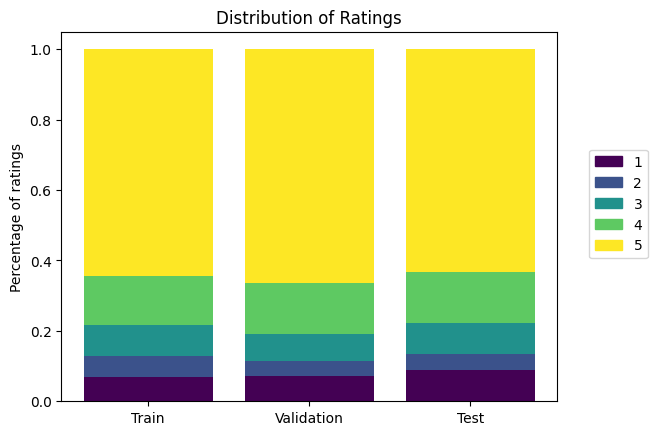

In [20]:
plot_dist(
    x_labels=["Train", "Validation", "Test"],
    model_res_values=[
        train_data["rating"].value_counts(normalize=True).sort_index().to_list(),
        validation_data["rating"].value_counts(normalize=True).sort_index().to_list(),
        test_data["rating"].value_counts(normalize=True).sort_index().to_list(),
    ],
    value_types=[
        train_data["rating"].value_counts().sort_index().index.to_list(),
        validation_data["rating"].value_counts().sort_index().index.to_list(),
        test_data["rating"].value_counts().sort_index().index.to_list(),
    ],
    title="Distribution of Ratings",
)

C:\Users\Guangchen\AppData\Local\Temp\ipykernel_26852\2139226709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap(


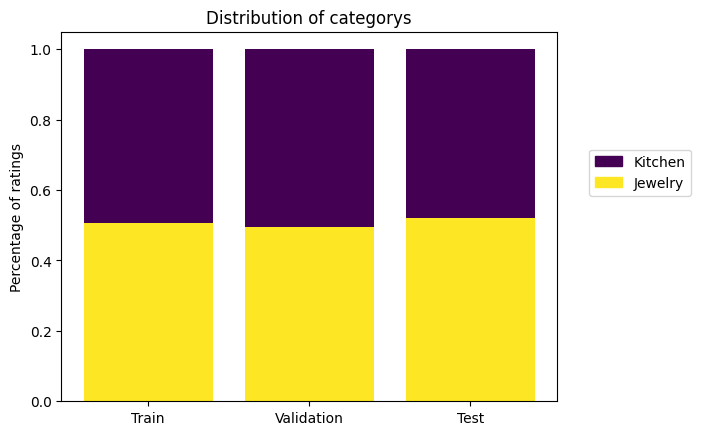

In [21]:
plot_dist(
    x_labels=["Train", "Validation", "Test"],
    model_res_values=[
        train_data["category"].value_counts(normalize=True).sort_index().to_list(),
        validation_data["category"].value_counts(normalize=True).sort_index().to_list(),
        test_data["category"].value_counts(normalize=True).sort_index().to_list(),
    ],
    value_types=[
        train_data["category"].value_counts().sort_index().index.to_list(),
        validation_data["category"].value_counts().sort_index().index.to_list(),
        test_data["category"].value_counts().sort_index().index.to_list(),
    ],
    title="Distribution of categorys",
)

## Convert to PyTorch Dataset

Now, I've finished the data cleaning step. I would prepare the data for the prediction task.

In [22]:
# To make it simple, I use the default TfidfVectorizer in sklearn.
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# This function is used to encode the text data into vector
def encode_text(train_texts, validation_texts, test_texts):
    # This function is used to encode the text data into vector
    tfidf_vectorizer = TfidfVectorizer()
    # To avoid data leakage, I fit the vectorizer on the training data only.
    tfidf_vectorizer.fit(train_texts)
    
    train_vector = tfidf_vectorizer.transform(train_texts).toarray().tolist()
    validation_vector = tfidf_vectorizer.transform(validation_texts).toarray().tolist()
    test_vector = tfidf_vectorizer.transform(test_texts).toarray().tolist()
    return train_vector, validation_vector, test_vector

train_product_title = train_data["product_title"].values.tolist()
validation_product_title = validation_data["product_title"].values.tolist()
test_product_title = test_data["product_title"].values.tolist()

train_product_vector, validation_product_vector, test_product_vector = encode_text(
    train_product_title, validation_product_title, test_product_title
)

train_data["product_title_vector"] = train_product_vector
validation_data["product_title_vector"] = validation_product_vector
test_data["product_title_vector"] = test_product_vector

train_review_text = train_data["review_text"].values.tolist()
validation_review_text = validation_data["review_text"].values.tolist()
test_review_text = test_data["review_text"].values.tolist()

train_review_vector, validation_review_vector, test_review_vector = encode_text(
    train_review_text, validation_review_text, test_review_text
)

train_data["review_text_vector"] = train_review_vector
validation_data["review_text_vector"] = validation_review_vector
test_data["review_text_vector"] = test_review_vector

In [24]:
# For the category feature, I use the OneHotEncoder in sklearn.
from sklearn.preprocessing import OneHotEncoder

def encode_category(train_category, validation_category, test_category):
    # This function is used to encode the category feature into vector
    onehot_encoder = OneHotEncoder(sparse_output=False)
    # To avoid data leakage, I fit the encoder on the training data only.
    onehot_encoder.fit(train_category)
    
    train_vector = onehot_encoder.transform(train_category)
    validation_vector = onehot_encoder.transform(validation_category)
    test_vector = onehot_encoder.transform(test_category)
    return train_vector, validation_vector, test_vector

train_rating = train_data["rating"].values.reshape(-1, 1)
validation_rating = validation_data["rating"].values.reshape(-1, 1)
test_rating = test_data["rating"].values.reshape(-1, 1)

train_rating_vector, validation_rating_vector, test_rating_vector = encode_category(
    train_rating, validation_rating, test_rating
)

train_data["rating_vector"] = train_rating_vector.tolist()
validation_data["rating_vector"] = validation_rating_vector.tolist()
test_data["rating_vector"] = test_rating_vector.tolist()

In [25]:
# The target feature is the category. I use 0 for "Kitchen" and 1 for "Jewelry".
train_data["binary_category"] = train_data["category"].apply(lambda x: 0 if x == "Kitchen" else 1)
validation_data["binary_category"] = validation_data["category"].apply(lambda x: 0 if x == "Kitchen" else 1)
test_data["binary_category"] = test_data["category"].apply(lambda x: 0 if x == "Kitchen" else 1)

In [26]:
# The input features are the product title, review text and rating.
train_data["input_embedding"] = train_data.apply(
    lambda x: x["product_title_vector"] + x["review_text_vector"] + x["rating_vector"], axis=1
)
validation_data["input_embedding"] = validation_data.apply(
    lambda x: x["product_title_vector"] + x["review_text_vector"] + x["rating_vector"], axis=1
)
test_data["input_embedding"] = test_data.apply(
    lambda x: x["product_title_vector"] + x["review_text_vector"] + x["rating_vector"], axis=1
)

In [27]:
train_data.head(3)

,id,product_title,rating,review_text,category,product_title_vector,review_text_vector,rating_vector,binary_category,input_embedding
775,d9b4e6d2-6aad-4cc6-9946-25d028dd2c2f,King Will DUO Unisex 6mm Classic Rose Gold Dom...,5,quality ring good price,Jewelry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1100,cc367014-35f1-4358-becb-e8ca7957cb23,48 Pack of Reusable Silicone Baking Cups / Cup...,4,"slightly smaller than standard size, they wobb...",Kitchen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1007,a2364dad-c4a9-4740-b033-575ac28ca327,EatSmart Precision Pro Digital Kitchen Scale,1,I've had this scale for about 6 months and it'...,Kitchen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Now, I can start to build the PyTorch Dataset.

In [28]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(train_data["input_embedding"].values.tolist(), dtype=torch.float)
y_train = torch.tensor(train_data["binary_category"].values.tolist(), dtype=torch.float)
X_validation = torch.tensor(validation_data["input_embedding"].values.tolist(), dtype=torch.float)
y_validation = torch.tensor(validation_data["binary_category"].values.tolist(), dtype=torch.float)
X_test = torch.tensor(test_data["input_embedding"].values.tolist(), dtype=torch.float)
y_test = torch.tensor(test_data["binary_category"].values.tolist(), dtype=torch.float)


train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)
test_dataset = TensorDataset(X_test, y_test)

# save the datasets
torch.save(train_dataset, "./pt_data/train_dataset.pt")
torch.save(validation_dataset, "./pt_data/validation_dataset.pt")
torch.save(test_dataset, "./pt_data/test_dataset.pt")

## Train a simple logistic regression model

Although I provide the .py file for reproducing the results. I still want to run it in the notebook to show the results in a straightforward way.

In [29]:
from tqdm import tqdm

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs


def run_epoch(dataloader, model, loss_function, optimizer=None, is_train=True):
    epoch_loss = 0
    epoch_acc = 0
    if is_train:
        model.train()
    else:
        model.eval()

    for batch in dataloader:
        X, y = batch
        with torch.set_grad_enabled(is_train):
            outputs = model(X)
            loss = loss_function(outputs, y.unsqueeze(1))
            acc = ((outputs > 0.5).float() == y.unsqueeze(1)).float().mean()

            if is_train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

In [30]:
num_epochs = 100
batch_size = 128
learning_rate = 1e-3
model = LogisticRegressionModel(input_dim=train_dataset[0][0].shape[0])
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_loss_list = []
train_acc_list = []
validation_loss_list = []
validation_acc_list = []
test_loss_list = []
test_acc_list = []


for epoch in tqdm(range(num_epochs)):
    train_loss, train_acc = run_epoch(train_dataloader, model, loss_function, optimizer, is_train=True)
    val_loss, val_acc = run_epoch(validation_dataloader, model, loss_function, is_train=False)
    test_loss, test_acc = run_epoch(test_dataloader, model, loss_function, is_train=False)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    validation_loss_list.append(val_loss)
    validation_acc_list.append(val_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

print(f"Best validation accuracy: {max(validation_acc_list)}")
print(f"Test accuracy: {test_acc_list[validation_acc_list.index(max(validation_acc_list))]}")

100%|██████████| 100/100 [00:01<00:00, 59.28it/s]

Best validation accuracy: 0.972021073102951
Test accuracy: 0.9643673896789551


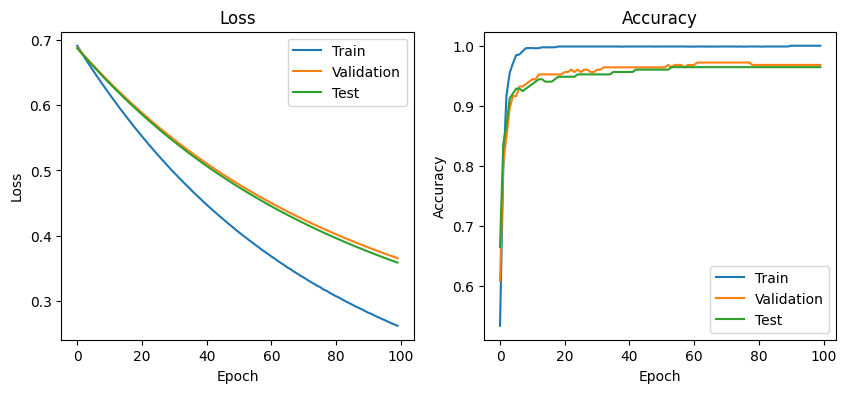

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(train_loss_list, label="Train")
ax[0].plot(validation_loss_list, label="Validation")
ax[0].plot(test_loss_list, label="Test")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()


ax[1].plot(train_acc_list, label="Train")
ax[1].plot(validation_acc_list, label="Validation")
ax[1].plot(test_acc_list, label="Test")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()